In [1]:
# Import the required libraries

import pymongo
import datetime
import collections

import pandas as pd
import scipy.stats

In [2]:
# Open a connection to the Mongo server, open the accidents database and name the collections of accidents and labels
# client = pymongo.MongoClient('mongodb://localhost:27017/')
client = pymongo.MongoClient('mongodb://localhost:27351/')

db = client.accidents
accidents = db.accidents
labels = db.labels

In [3]:
# Load the expanded names of keys and human-readable codes into memory

expanded_name = collections.defaultdict(str)
for e in labels.find({'expanded': {"$exists": True}}):
    expanded_name[e['label']] = e['expanded']
    
label_of = collections.defaultdict(str)
for l in labels.find({'codes': {"$exists": True}}):
    for c in l['codes']:
        try:
            label_of[l['label'], int(c)] = l['codes'][c]
        except ValueError: 
            label_of[l['label'], c] = l['codes'][c]

# Activity 1

In [10]:
sorted([(code, label_of[key, code]) for key, code in label_of if key == 'Age_Band_of_Driver'])

[(1, '0 - 5'),
 (2, '6 - 10'),
 (3, '11 - 15'),
 (4, '16 - 20'),
 (5, '21 - 25'),
 (6, '26 - 35'),
 (7, '36 - 45'),
 (8, '46 - 55'),
 (9, '56 - 65'),
 (10, '66 - 75'),
 (11, 'Over 75')]

In [11]:
sorted([(code, label_of[key, code]) for key, code in label_of if key == 'Age_Band_of_Casualty'])

[]

In [12]:
sorted([(code, label_of[key, code]) for key, code in label_of if key == 'Casualty_Class'])

[(1, 'Driver or rider'), (2, 'Passenger'), (3, 'Pedestrian')]

In [13]:
driver_passenger_unrolled_df = pd.DataFrame([
    {'Age_Band_of_Driver': v['Age_Band_of_Driver'], 
     'Age_Band_of_Casualty': c['Age_Band_of_Casualty']}
    for a in accidents.find({})
    for c in a['Casualties']
    for v in a['Vehicles']
    if c['Vehicle_Reference'] == v['Vehicle_Reference']
    if c['Casualty_Class'] == 2
    if c['Age_Band_of_Casualty'] != -1
    if v['Age_Band_of_Driver'] != -1 ])
driver_passenger_unrolled_df

,Age_Band_of_Casualty,Age_Band_of_Driver
0,5,5
1,11,5
2,4,4
3,4,4
4,4,4
5,6,7
6,6,9
7,5,7
8,7,9
9,5,6


In [14]:
driver_passenger_df = pd.crosstab(driver_passenger_unrolled_df['Age_Band_of_Driver'],
                                  driver_passenger_unrolled_df['Age_Band_of_Casualty'])
driver_passenger_df

Age_Band_of_Casualty,1,2,3,4,5,6,7,8,9,10,11
Age_Band_of_Driver,,,,,,,,,,,
2,0,3,0,0,0,0,0,0,0,0,0
3,1,4,27,10,0,0,0,0,0,0,0
4,48,39,315,3482,665,217,145,133,49,13,15
5,355,103,176,1402,2298,835,242,276,109,48,52
6,912,853,519,740,1473,2928,787,508,406,181,184
7,572,1025,1120,945,641,1354,1690,690,404,337,233
8,220,348,651,840,668,774,978,1384,452,362,355
9,100,126,203,265,248,419,328,661,1137,321,308
10,22,56,71,63,46,90,132,128,392,740,210


In [15]:
driver_passenger_long_df = driver_passenger_df.stack().reset_index()
driver_passenger_long_df

,Age_Band_of_Driver,Age_Band_of_Casualty,0
0,2,1,0
1,2,2,3
2,2,3,0
3,2,4,0
4,2,5,0
5,2,6,0
6,2,7,0
7,2,8,0
8,2,9,0
9,2,10,0


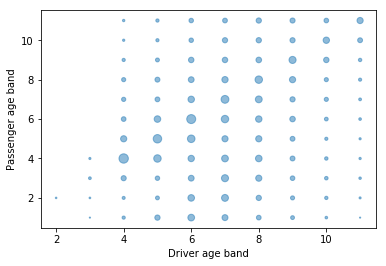

In [16]:
plt.scatter(driver_passenger_long_df['Age_Band_of_Driver'], 
            driver_passenger_long_df['Age_Band_of_Casualty'],
            s=np.sqrt(driver_passenger_long_df[0])*1.5,
            alpha=0.5 )
plt.xlabel('Driver age band')
plt.ylabel('Passenger age band')

plt.show()

We can now apply the `spearmanr` function to calculate Spearman's *ρ* (rho) value of correlation. 

Note that we have to give each accident on its own row: if there are 44,000 passenger casualties, the `spearman` function must be passed lists with 44,000 items.

Recall that values near +1 show good positive correlation, values near -1 show good negative correlation, and values near 0 show no particular correlation. The `scipy` function returns a second value, the *p* value of the result. 

In [17]:
scipy.stats.spearmanr(driver_passenger_unrolled_df['Age_Band_of_Driver'], 
                      driver_passenger_unrolled_df['Age_Band_of_Casualty'])

SpearmanrResult(correlation=0.40612591615498272, pvalue=0.0)

This shows a resonable correlation: the older the driver, the older the passengers. 

The *p* value of zero means that this correlation cannot be explained by chance: we should reject the null hypothesis that the ages of drivers and passengers are unrelated. In other words, the correlation is a real one.

# Activity 2

In [4]:
# What are the weather types?
[(code, label_of[key, code]) for key, code in label_of if key == 'Weather_Conditions']

[(3, 'Snowing no high winds'),
 (5, 'Raining + high winds'),
 (7, 'Fog or mist'),
 (1, 'Fine no high winds'),
 (2, 'Raining no high winds'),
 (9, 'Unknown'),
 (4, 'Fine + high winds'),
 (-1, 'Data missing or out of range'),
 (6, 'Snowing + high winds'),
 (8, 'Other')]

In [5]:
# Build a DataFrame, one row for each accident
speed_by_weather_unrolled_df = pd.DataFrame(list(accidents.find({}, ['Speed_limit', 'Weather_Conditions'])))

# Count the number of each severity
speed_by_weather_df = pd.crosstab(speed_by_weather_unrolled_df['Speed_limit'], 
                                      speed_by_weather_unrolled_df['Weather_Conditions'])


In [6]:
speed_by_weather_df

Weather_Conditions,1,2,3,4,5,6,7,8,9
Speed_limit,,,,,,,,,
10,1,0,0,0,0,0,0,0,0
20,1836,258,10,16,21,0,7,45,54
30,76326,12425,293,718,1101,37,317,1736,2042
40,9360,1697,32,117,166,8,76,260,198
50,3959,835,26,49,107,7,55,113,69
60,15792,3290,149,274,467,37,324,615,224
70,7469,1611,74,115,316,17,126,170,124


In [7]:
speed_by_weather_df.columns = [label_of['Weather_Conditions', w] for w in speed_by_weather_df.columns]
speed_by_weather_df

,Fine no high winds,Raining no high winds,Snowing no high winds,Fine + high winds,Raining + high winds,Snowing + high winds,Fog or mist,Other,Unknown
Speed_limit,,,,,,,,,
10,1,0,0,0,0,0,0,0,0
20,1836,258,10,16,21,0,7,45,54
30,76326,12425,293,718,1101,37,317,1736,2042
40,9360,1697,32,117,166,8,76,260,198
50,3959,835,26,49,107,7,55,113,69
60,15792,3290,149,274,467,37,324,615,224
70,7469,1611,74,115,316,17,126,170,124


We need to remove some of the rows and columns, to ensure that every cell has at least 5 elements. Let's remove the 10 and 20mph zone data, and the 'missing' weather column.

In [8]:
# speed_by_weather_df.drop('Data missing or out of range', axis=1, inplace=True)
speed_by_weather_df.drop(10, axis=0, inplace=True)
speed_by_weather_df.drop(20, axis=0, inplace=True)
speed_by_weather_df

,Fine no high winds,Raining no high winds,Snowing no high winds,Fine + high winds,Raining + high winds,Snowing + high winds,Fog or mist,Other,Unknown
Speed_limit,,,,,,,,,
30,76326,12425,293,718,1101,37,317,1736,2042
40,9360,1697,32,117,166,8,76,260,198
50,3959,835,26,49,107,7,55,113,69
60,15792,3290,149,274,467,37,324,615,224
70,7469,1611,74,115,316,17,126,170,124


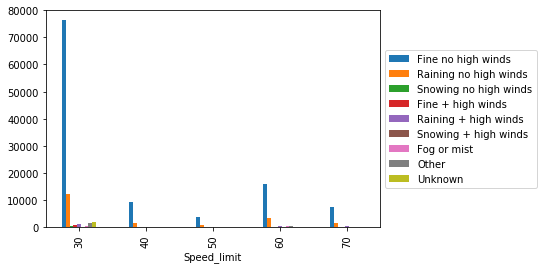

In [9]:
ax = speed_by_weather_df.plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
chi2, p, _, _ = scipy.stats.chi2_contingency(speed_by_weather_df)
chi2, p

(1551.4532698476551, 2.2070022783712078e-306)

The very small *p* value shows that this is a significant result: weather conditions affect accident rates differently on different roads.

Note that the chi-squared test doesn't tell us anything about *how* the weather conditions affect accident rates, only that they do.